In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##### Loading the dataset

In [2]:
leads_data=pd.read_csv("Leads.csv")

In [3]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##### Understanding the dataset

In [4]:
leads_data.shape

(9240, 37)

##### Checking the data type of columns and null values

In [5]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### Handling 'Select' level value that is present in multiple columns

In [7]:
leads_data=leads_data.replace('Select',np.nan)

##### Missing Value Check

In [8]:
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
round(leads_data.isnull().sum() / len(leads_data.index),2) * 100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

##### Dropping columns with missing valaue is more or equal to 40%

In [10]:
leads_data=leads_data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'])

##### Checking null data percentage again

In [11]:
round(leads_data.isnull().sum() / len(leads_data.index),2) * 100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

##### Data Preparation and EDA(Exploratory Data Analysis)

In [12]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### Imputing missing values in columns

In [13]:
leads_data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [14]:
leads_data['Specialization'].isnull().sum() / len(leads_data['Specialization']) * 100

36.58008658008658

##### 'Specialization' column has 36% null values

In [15]:
leads_data['Specialization']=leads_data['Specialization'].replace(np.nan , 'Others')

In [16]:
leads_data['Specialization'].isnull().sum() / len(leads_data['Specialization']) * 100

0.0

In [17]:
leads_data['Country'].isnull().sum() 

2461

In [18]:
leads_data['Country'].isnull().sum() / len(leads_data['Country']) * 100

26.634199134199132

##### 'Country' column has 26% null values

In [19]:
leads_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [20]:
leads_data['Country']=leads_data['Country'].replace(np.nan , 'India')

In [21]:
leads_data['Country'].isnull().sum() / len(leads_data['Country']) * 100

0.0

In [22]:
leads_data['What is your current occupation'].isnull().sum()

2690

In [23]:
leads_data['What is your current occupation'].isnull().sum() / len(leads_data['What is your current occupation']) * 100

29.11255411255411

##### 'What is your current occupation' Column has 29% null values

In [24]:
leads_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
leads_data['What is your current occupation']=leads_data['What is your current occupation'].replace(np.nan , 'Unemployed')

In [26]:
leads_data['What is your current occupation'].isnull().sum() / len(leads_data['What is your current occupation']) * 100

0.0

In [27]:
leads_data['What matters most to you in choosing a course'].isnull().sum()

2709

In [28]:
leads_data['What matters most to you in choosing a course'].isnull().sum() / len(leads_data['What matters most to you in choosing a course']) * 100

29.318181818181817

##### 'What matters most to you in choosing a course' Column has 29% null values

In [29]:
leads_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

##### Dropping 'What matters most to you in choosing a course' column as it seems irrelevant

In [30]:
leads_data=leads_data.drop('What matters most to you in choosing a course',axis=1)

In [31]:
round(leads_data.isnull().sum() / len(leads_data.index),2) * 100

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Country                                      0.0
Specialization                               0.0
What is your current occupation              0.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendati

##### 'Tags' coulmn has 36% null values and 'City' column has 40% null values

In [32]:
leads_data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [33]:
leads_data['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

##### Imputing data for null values in 'Tags' & 'City' columns

In [34]:
leads_data['Tags']=leads_data['Tags'].replace(np.nan , 'Will revert after reading the email')

In [35]:
leads_data['City']=leads_data['City'].replace(np.nan , 'Mumbai')

In [36]:
round(leads_data.isnull().sum() / len(leads_data.index),2) * 100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

##### Few columns has 1% missing values , hence dropping such values

In [37]:
leads_data.dropna(inplace = True)

In [38]:
round(leads_data.isnull().sum() / len(leads_data.index),2) * 100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

##### Data Visulaization Using EDA

In [39]:
cont_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
cat_cols=['Specialization','Tags','City','Country']
target_col=['Converted']

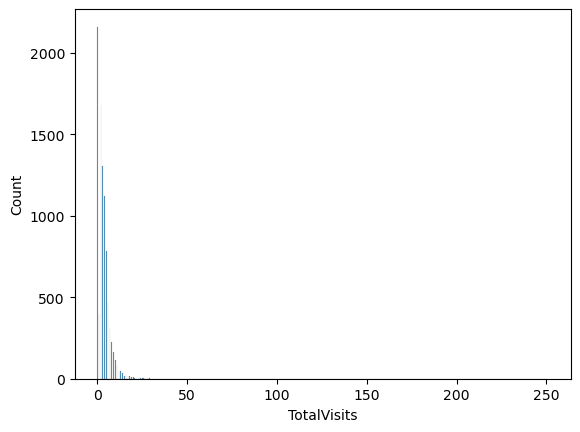

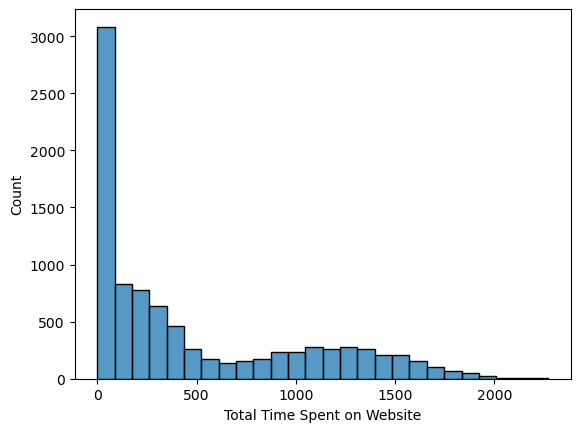

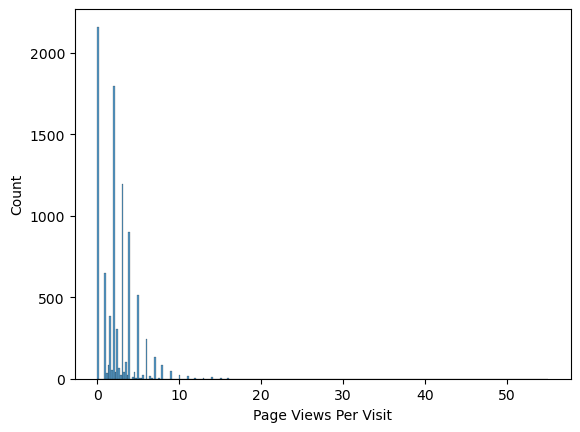

In [40]:
for i in cont_cols:
    sns.histplot(x=leads_data[i])
    plt.show()

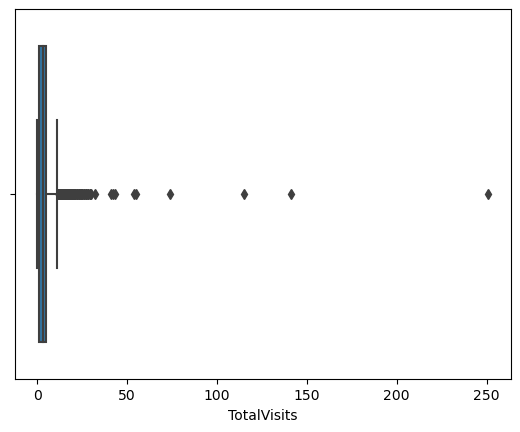

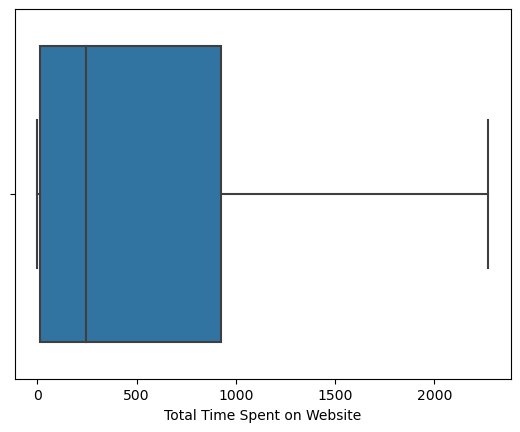

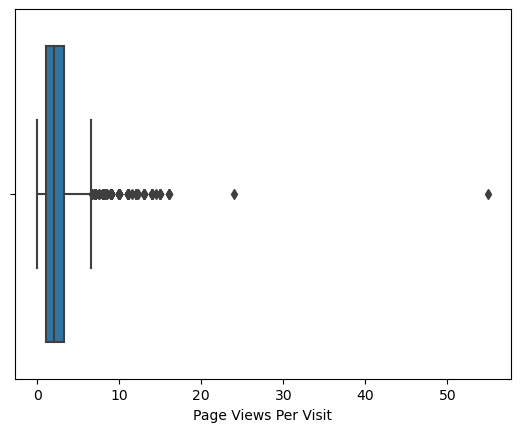

In [41]:
for i in cont_cols:
    sns.boxplot(x=leads_data[i])
    plt.show()

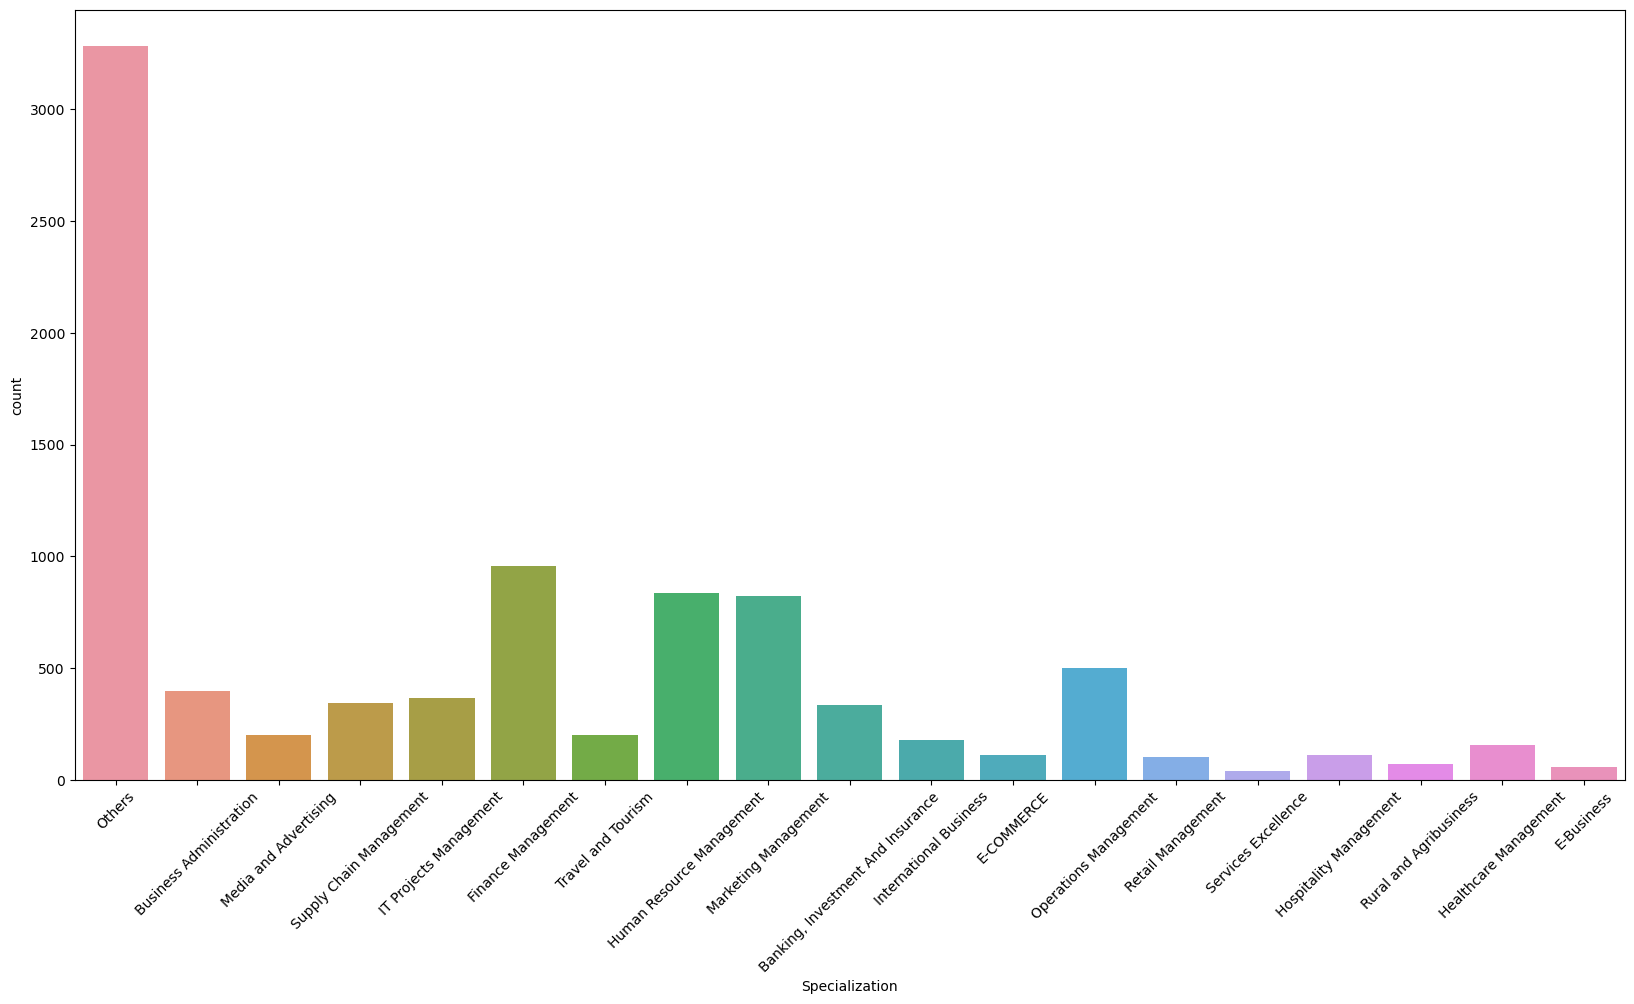

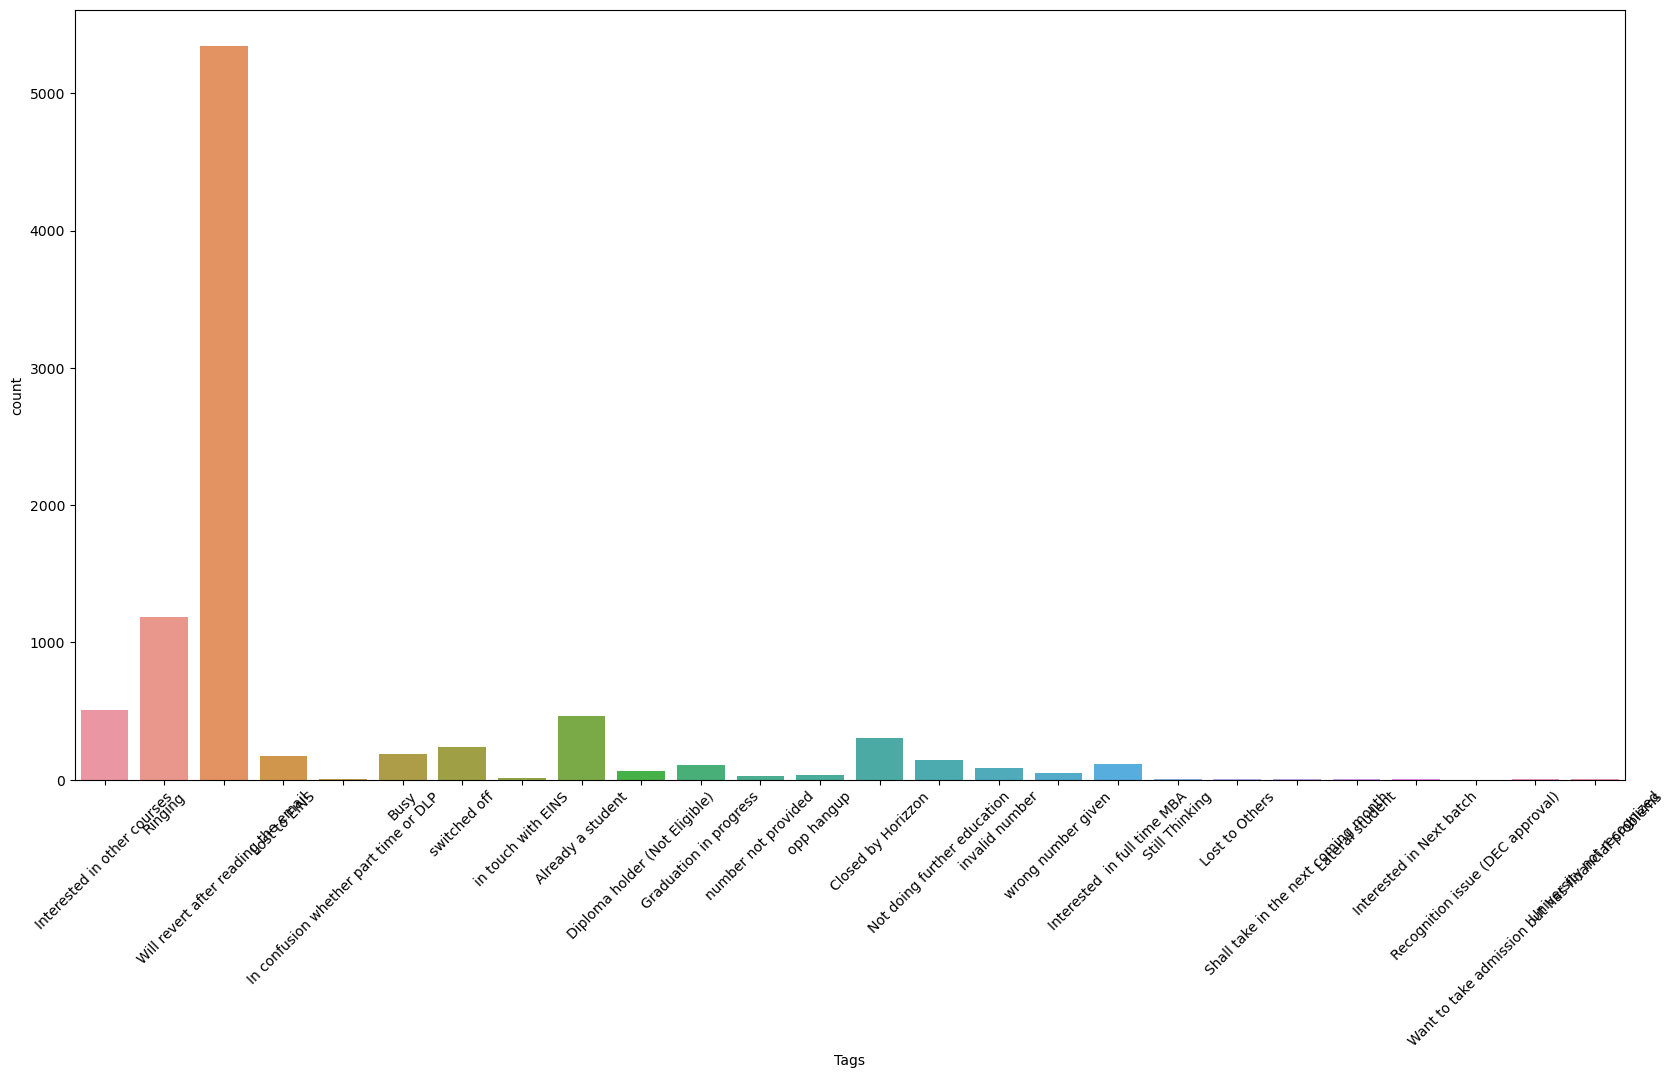

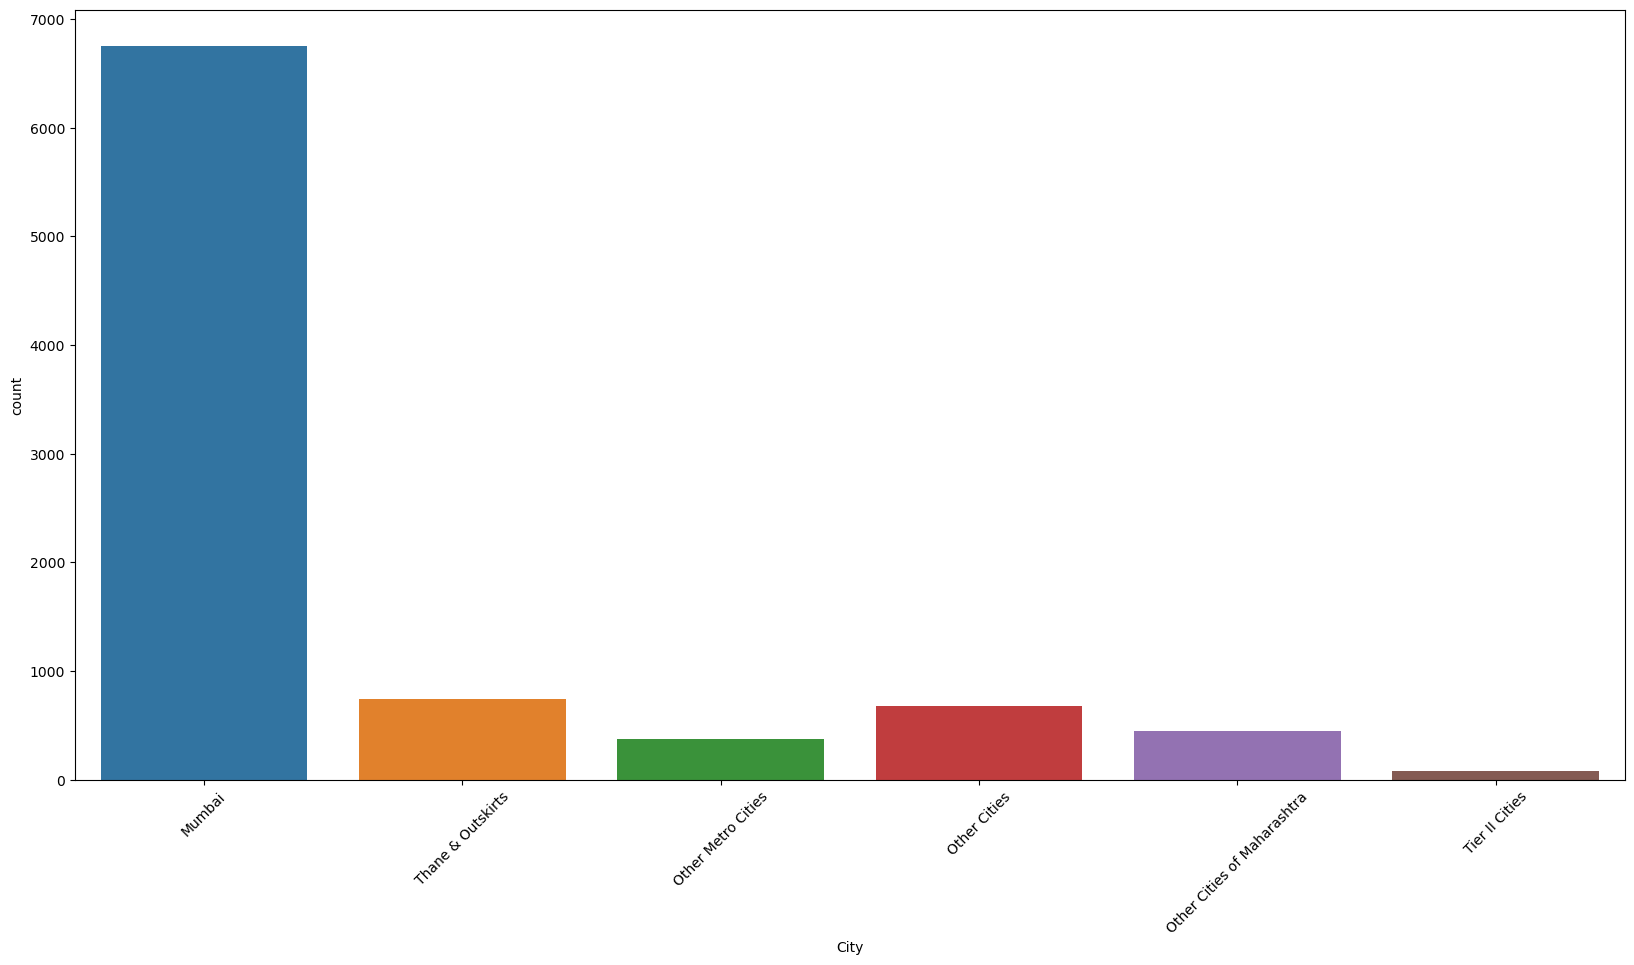

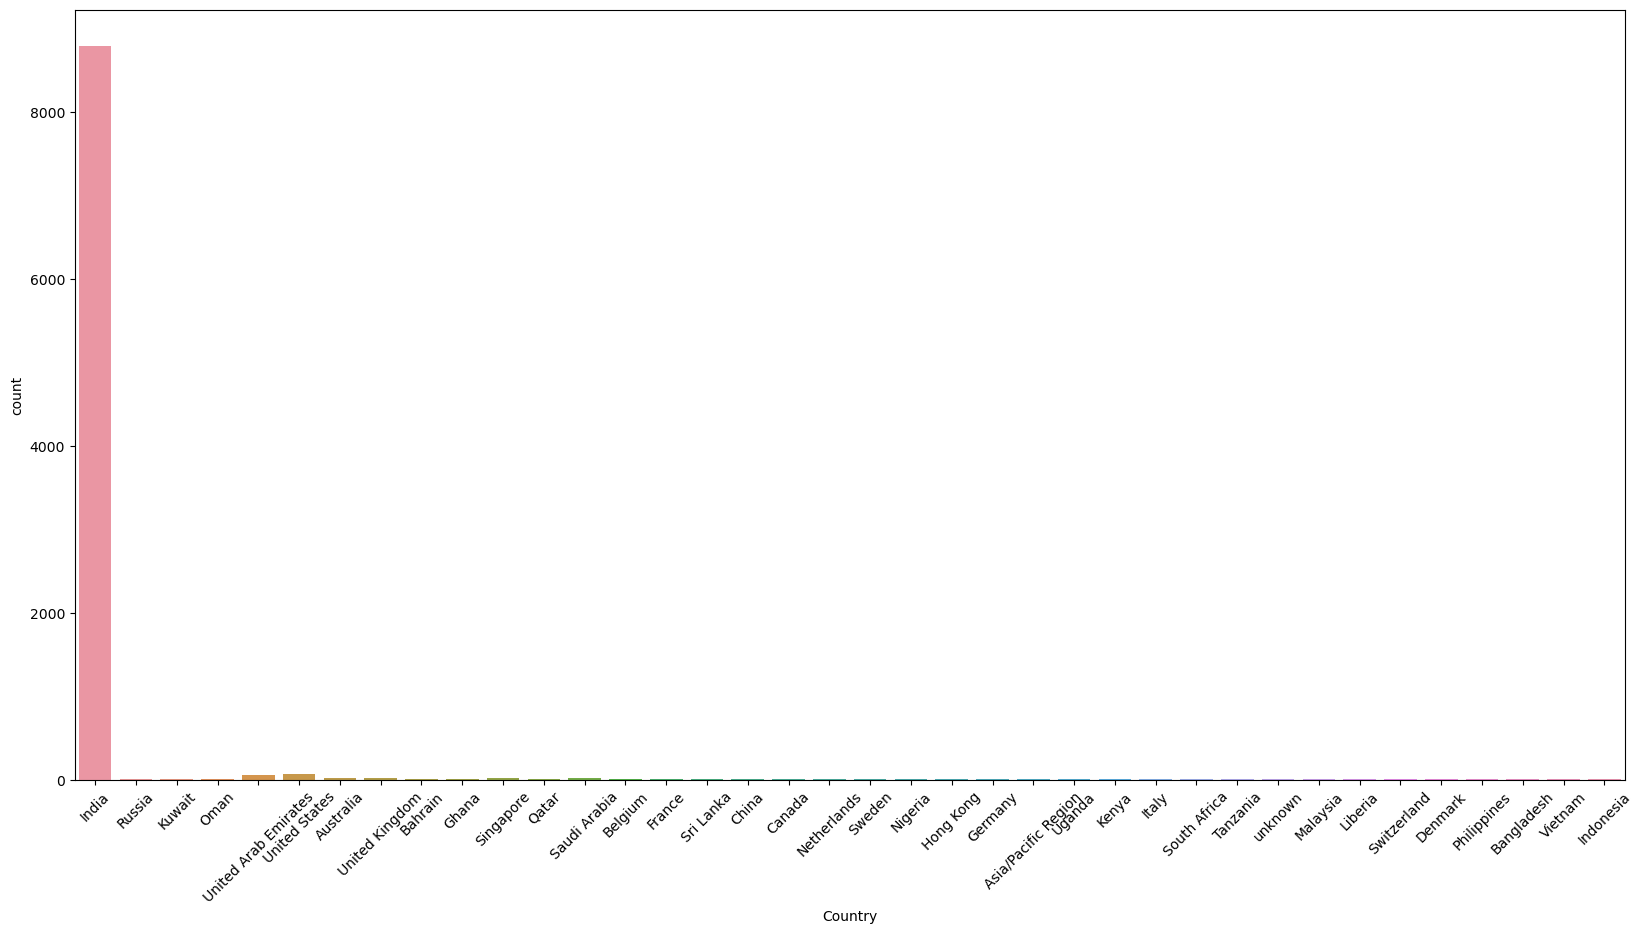

In [42]:
for i in cat_cols:
    plt.figure(figsize=(20,10))
    sns.countplot(x=leads_data[i])
    plt.xticks(rotation=45)
    plt.show()

##### Analysis Comments:- Maximum values are 'India' for 'Country' column.No conclusion can be drawn from 'Country' column


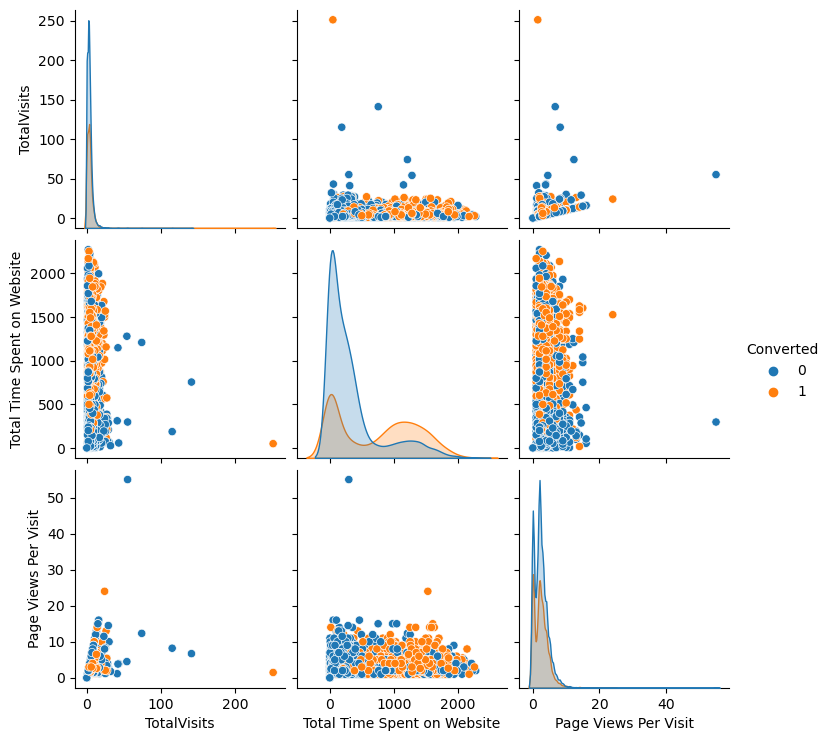

In [43]:
sns.pairplot(data=leads_data,vars=cont_cols,hue='Converted')
plt.show()

##### Checking For Data Duplication

In [44]:
leads_data[leads_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


##### Analysing target column 'Converted'

In [45]:
Converted=(sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
Converted

37.85541106458012

##### Leads conversion rate is 37.85%

In [46]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

##### Analysing more columns for improving lead conversion rate

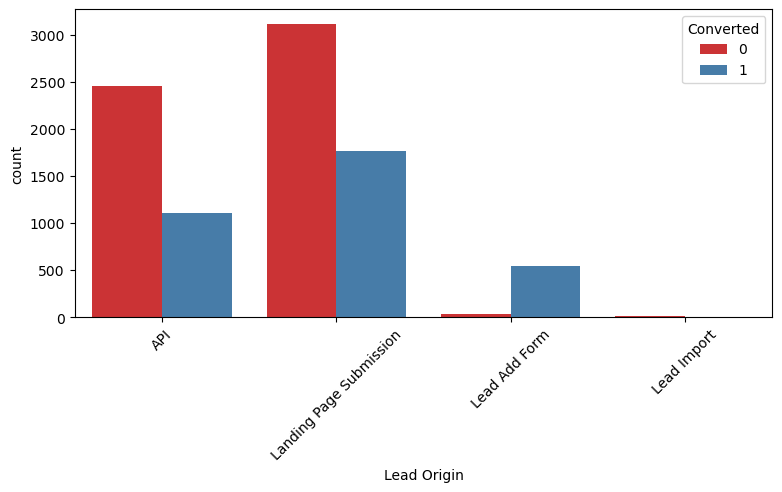

In [47]:
plt.figure(figsize=(9,4))
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_data,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

##### Analysis comments:-
1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them seems considerable
2. Lead Add Form has more than 90% conversion rate but count of lead does not seem very high
3. Lead Import count seems very low

##### Recommendation:-

##### We need to focus on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form

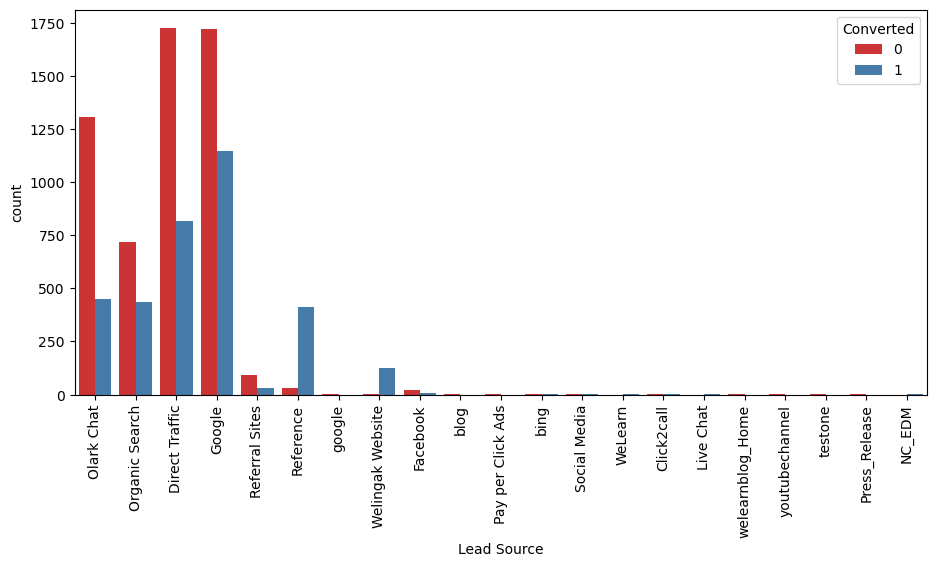

In [48]:
plt.figure(figsize=(11,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

##### Replacing 'google' with 'Google'

In [49]:
leads_data['Lead Source'] = leads_data['Lead Source'].replace('google', 'Google')

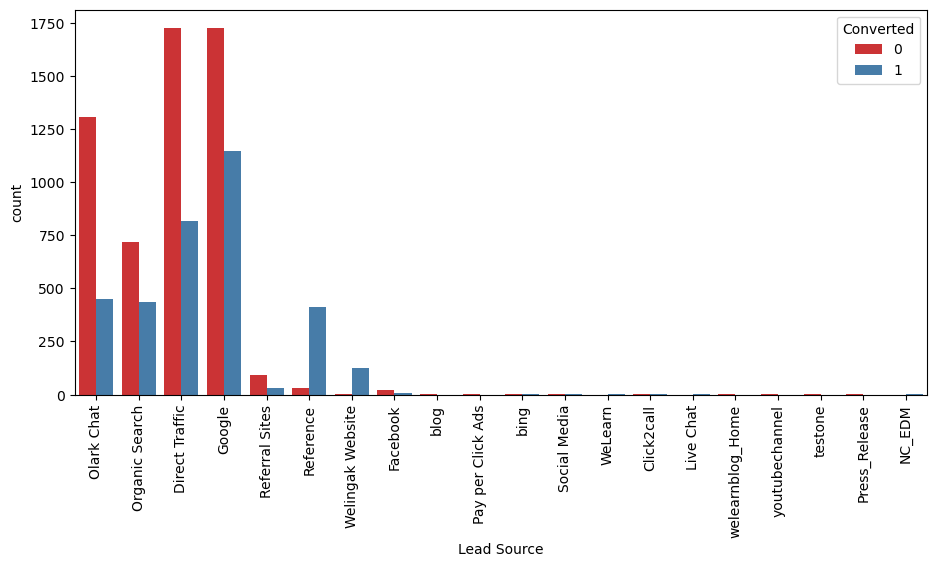

In [50]:
plt.figure(figsize=(11,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

##### Creating separate category 'Others' for Lead Sources which have too low values

In [51]:
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'],'Others')

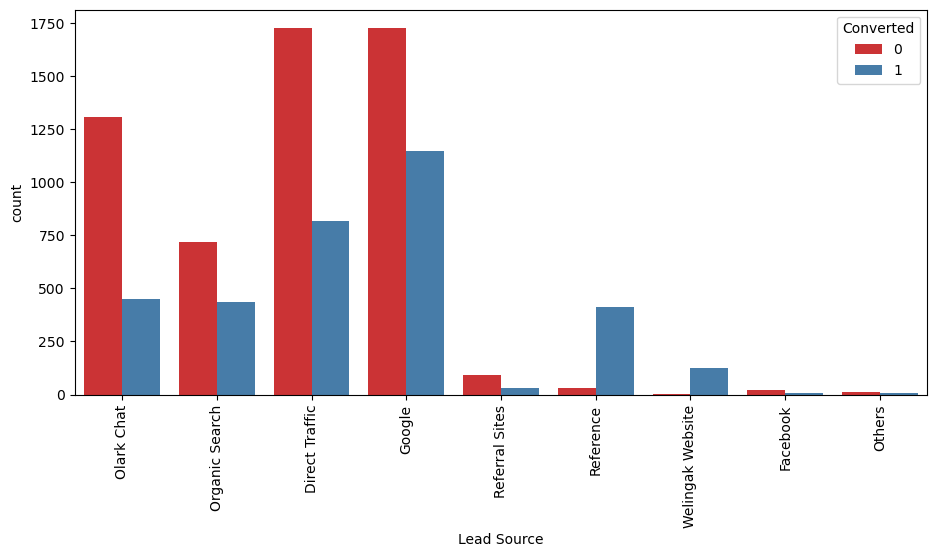

In [52]:
plt.figure(figsize=(11,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

##### Analysis comments:-
1. Maximum leads are generated by Google and Direct traffic
2. Conversion rate seems high for Reference leads and leads generated through Welingak website

##### Recommendations:-

##### We need to focus on improving lead conversion of olark chat, organic search, direct traffic, and google leads. 

##### We can also generate more leads from Reference leads and Welingak website. This will improve overall lead conversion rate.

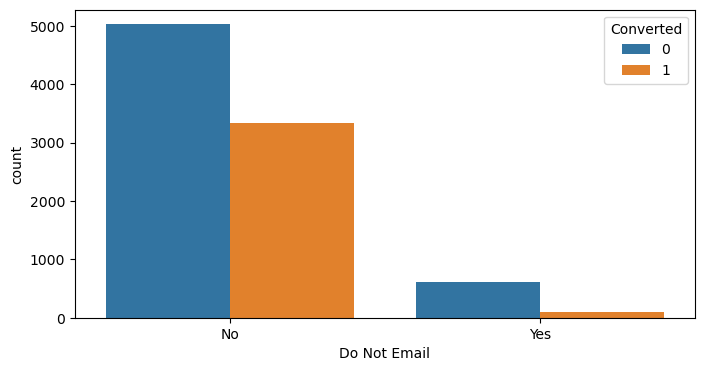

In [53]:
plt.figure(figsize=(8,4))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_data)
plt.show()

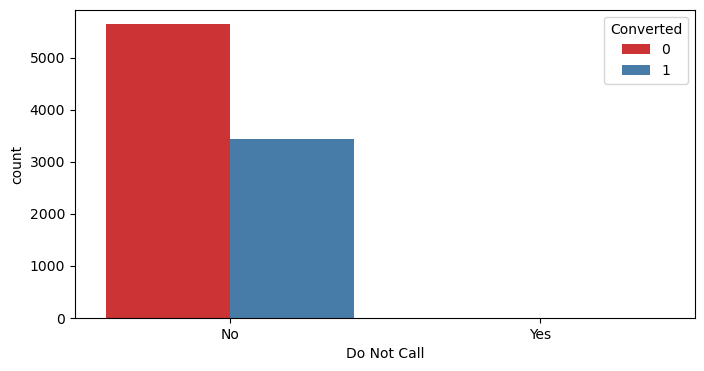

In [54]:
plt.figure(figsize=(8,4))
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_data,palette='Set1')
plt.show()

##### Analysis Comments:-
Most entries in 'Do Not Email' & 'Do Not Call' columns are 'No'. Hence no conclusion can be drawn from these columns

In [55]:
leads_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

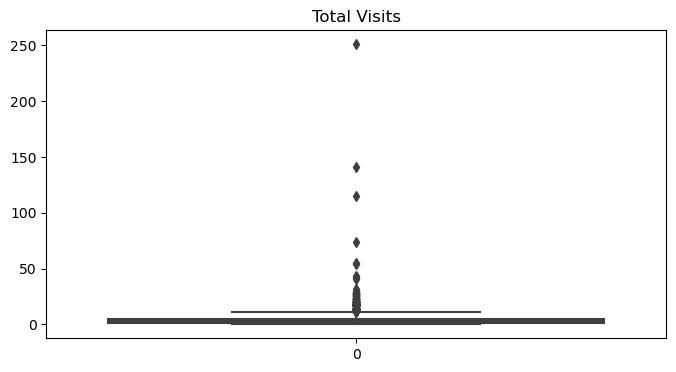

In [56]:
plt.figure(figsize=(8,4))
sns.boxplot(leads_data['TotalVisits'],orient='vert')
plt.title('Total Visits')
plt.show()

##### There are outliers in data for 'TotalVisits' column. We will cap the outliers to 95% value for our analysis

In [57]:
percentiles = leads_data['TotalVisits'].quantile([0.05,0.95]).values
leads_data['TotalVisits'][leads_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_data['TotalVisits'][leads_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

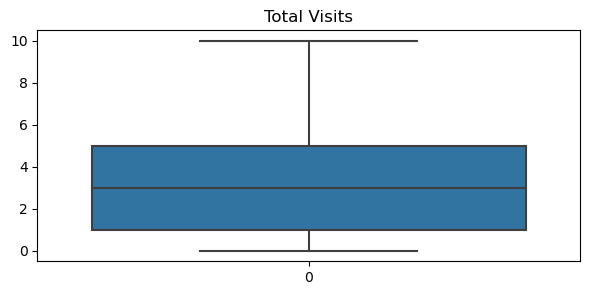

In [58]:
plt.figure(figsize=(7,3))
sns.boxplot(leads_data['TotalVisits'],orient='vert')
plt.title('Total Visits')
plt.show()

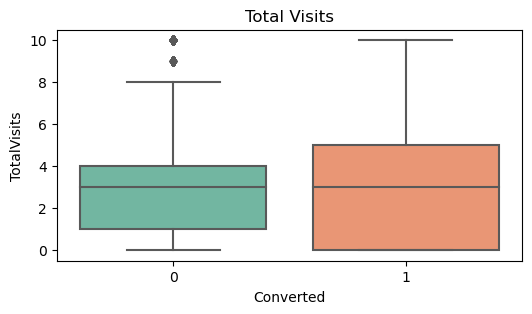

In [59]:
plt.figure(figsize=(6,3))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data,palette='Set2')
plt.title('Total Visits')
plt.show()

##### Analysis Comments:-
Median is same for Converted and Not Converted leads. No conclusion can be drawn on basis on 'TotalVisits' column

In [60]:
leads_data['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

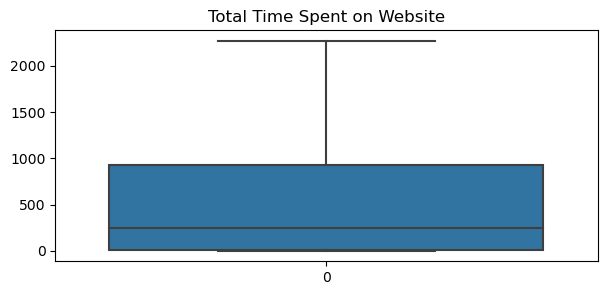

In [61]:
plt.figure(figsize=(7,3))
sns.boxplot(leads_data['Total Time Spent on Website'],orient='vert')
plt.title('Total Time Spent on Website')
plt.show()

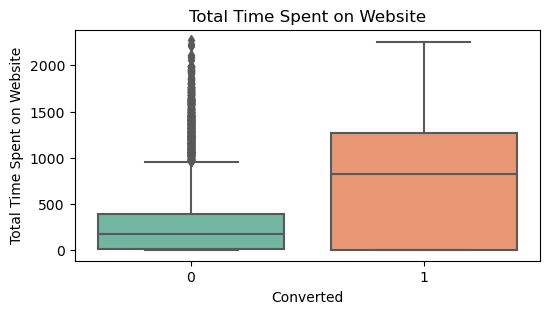

In [62]:
plt.figure(figsize=(6,3))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_data,palette='Set2')
plt.title('Total Time Spent on Website')
plt.show()

##### Analysis Comments:-
##### Leads spending more time on website seems to have high conversion rate

In [63]:
leads_data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

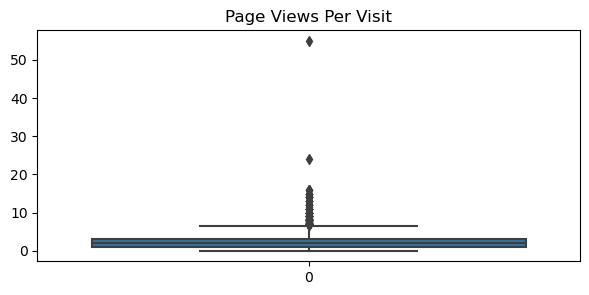

In [64]:
plt.figure(figsize=(7,3))
sns.boxplot(leads_data['Page Views Per Visit'],orient='vert')
plt.title("Page Views Per Visit")
plt.show()

##### There are outliers in data for 'Page Views Per Visit' column. We will cap the outliers to 95% value for our analysis

In [65]:
percentiles = leads_data['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

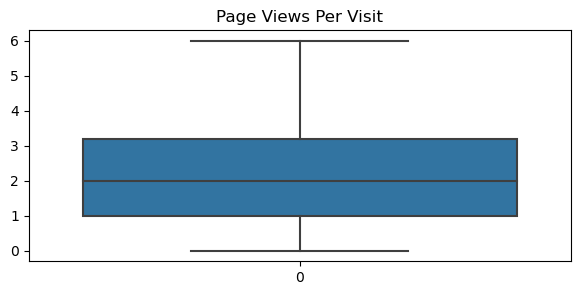

In [66]:
plt.figure(figsize=(7,3))
sns.boxplot(leads_data['Page Views Per Visit'],orient='vert')
plt.title("Page Views Per Visit")
plt.show()

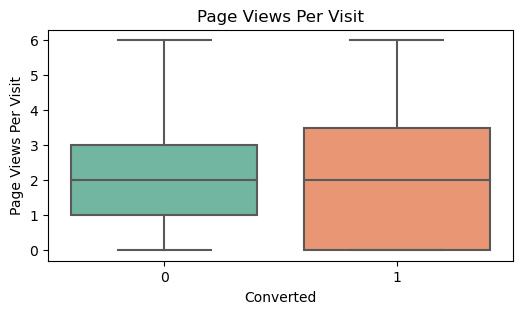

In [67]:
plt.figure(figsize=(6,3))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_data,palette='Set2')
plt.title('Page Views Per Visit')
plt.show()

##### Analysis Comments:-
Median is same for Converted and Not Converted leads. No conclusion can be drawn on basis on 'Page Views Per Visit' column

In [68]:
leads_data['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

In [69]:
leads_data['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

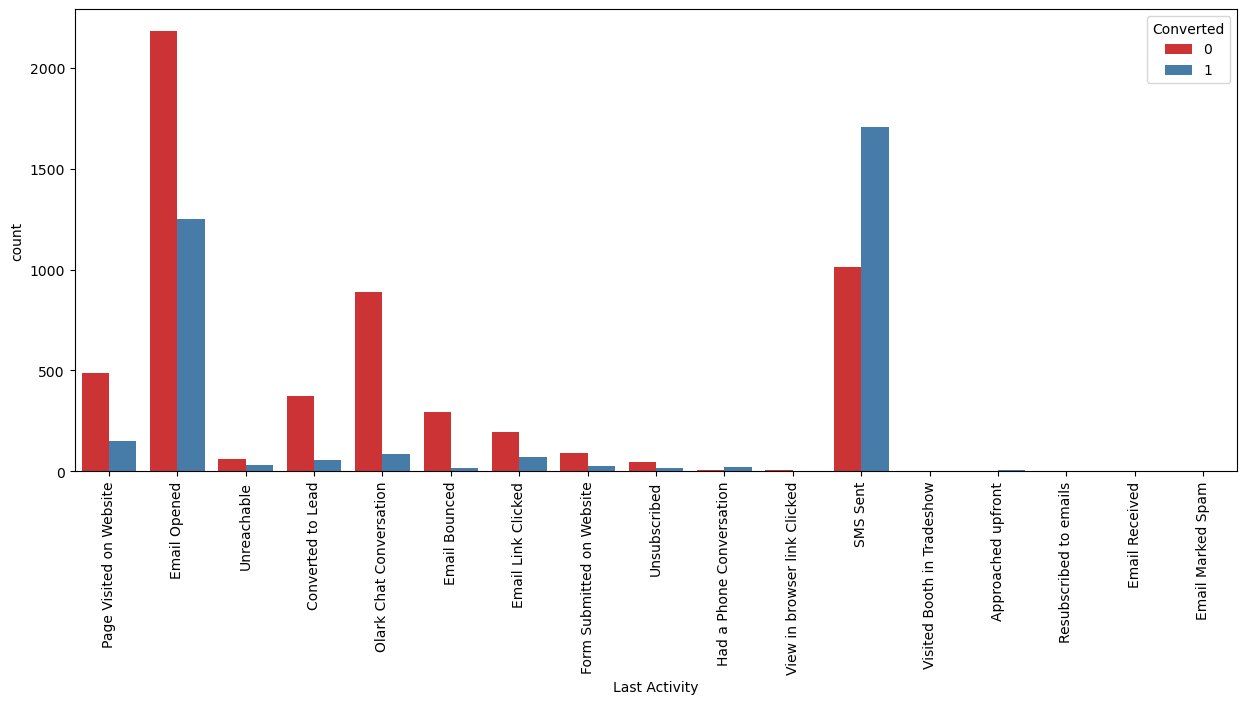

In [70]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

##### Analysis Comments:-
Conversion rate seems to be high for leads who have "Email Opened" as their last activity
Conversion rate for leads with last activity as "SMS Sent" is significantly high compared to remaining activities

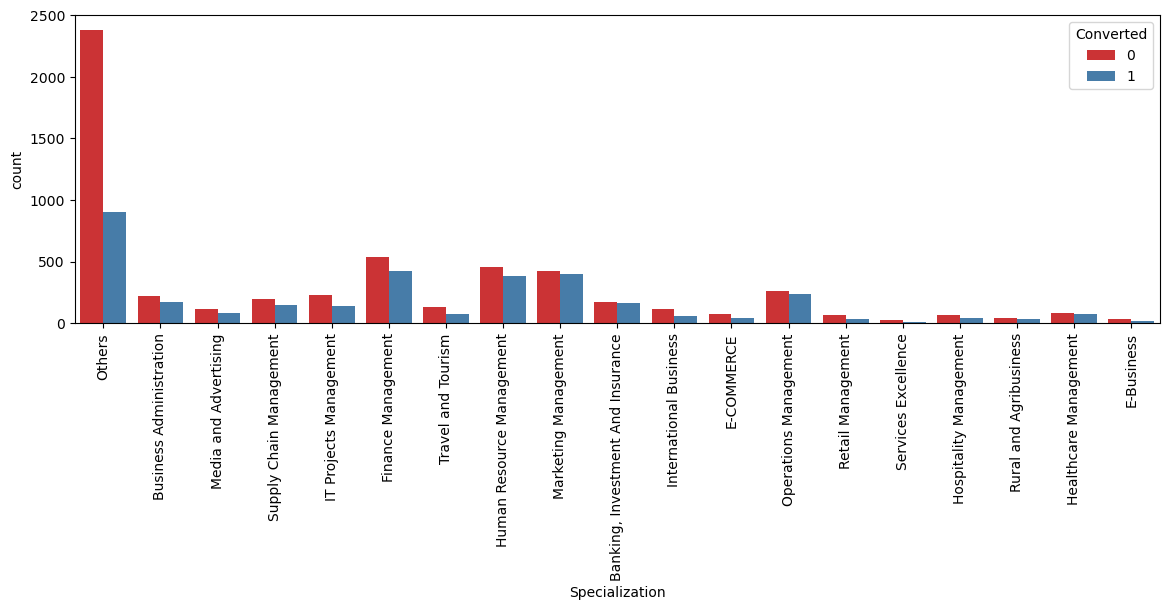

In [71]:
plt.figure(figsize=(14,4))
sns.countplot(x = "Specialization", hue = "Converted", data = leads_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

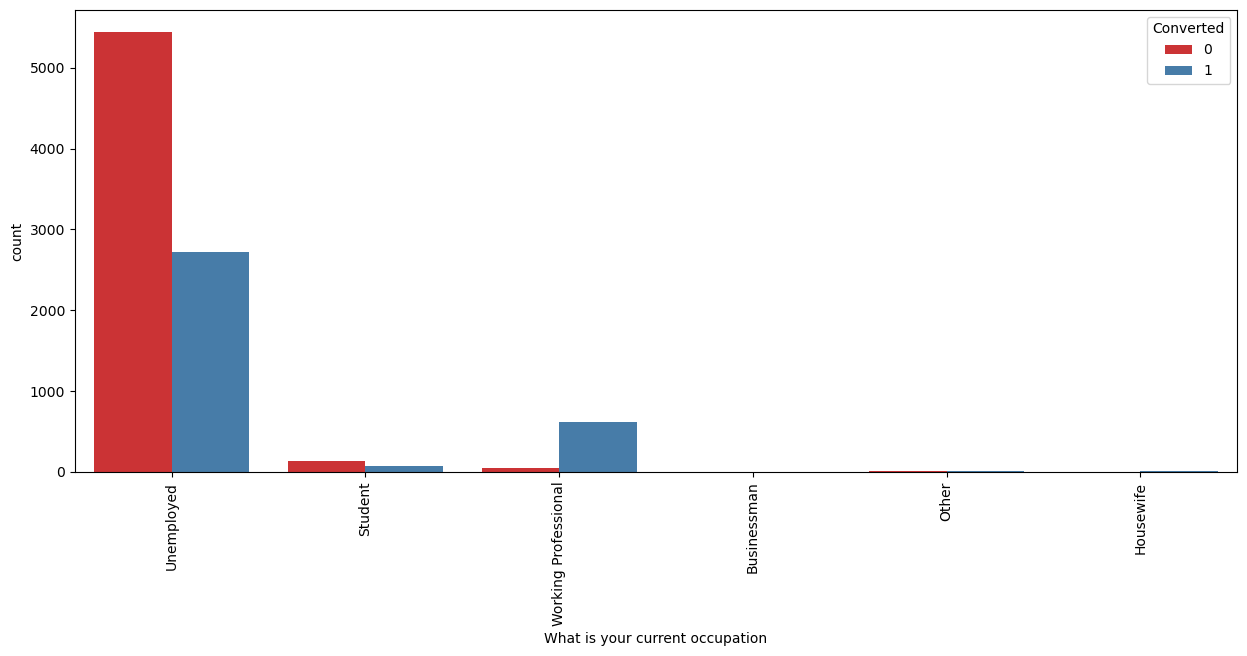

In [72]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

##### Analysis Comments:-
1. Working Professionals are more likely to join the course
2. Unemployed users are maximum in number but have 2nd highest conversion rate.

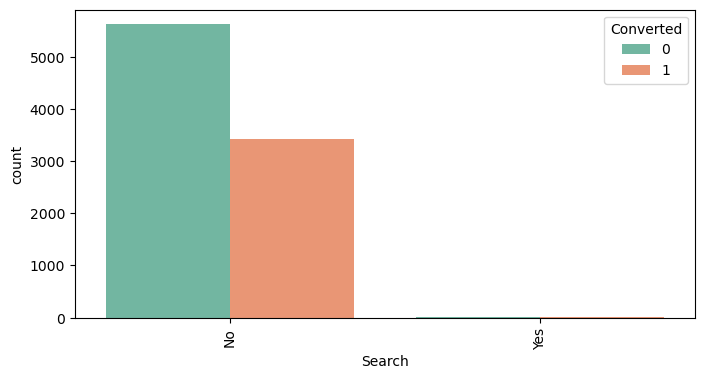

In [73]:
plt.figure(figsize=(8,4))
sns.countplot(x = "Search", hue = "Converted", data = leads_data,palette='Set2')
plt.xticks(rotation = 90)
plt.show()

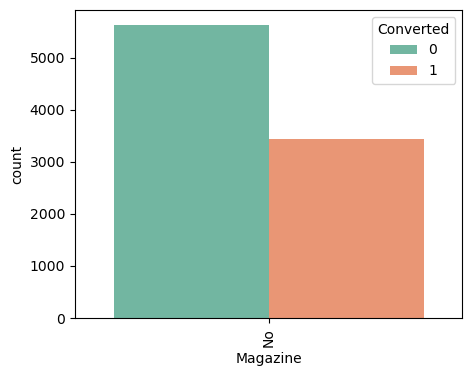

In [74]:
plt.figure(figsize=(5,4))
sns.countplot(x = "Magazine", hue = "Converted", data = leads_data,palette='Set2')
plt.xticks(rotation = 90)
plt.show()

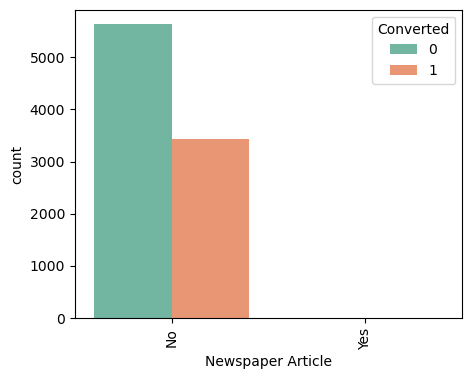

In [75]:
plt.figure(figsize=(5,4))
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads_data,palette='Set2')
plt.xticks(rotation = 90)
plt.show()

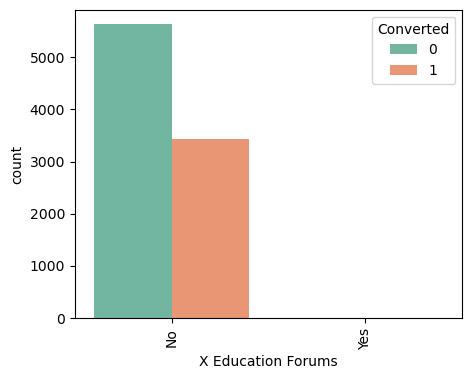

In [76]:
plt.figure(figsize=(5,4))
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads_data,palette='Set2')
plt.xticks(rotation = 90)
plt.show()

##### Analysis Comments:-
Most entries are 'No' for 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums'. Hence no conclusion can be drwan from these columns

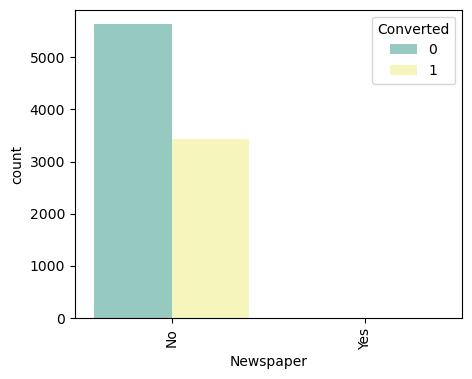

In [77]:
plt.figure(figsize=(5,4))
sns.countplot(x = "Newspaper", hue = "Converted", data = leads_data,palette='Set3')
plt.xticks(rotation = 90)
plt.show()

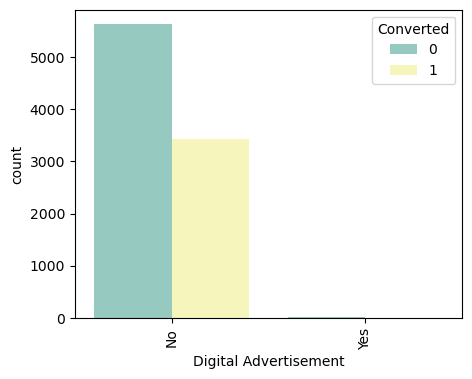

In [78]:
plt.figure(figsize=(5,4))
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads_data,palette='Set3')
plt.xticks(rotation = 90)
plt.show()

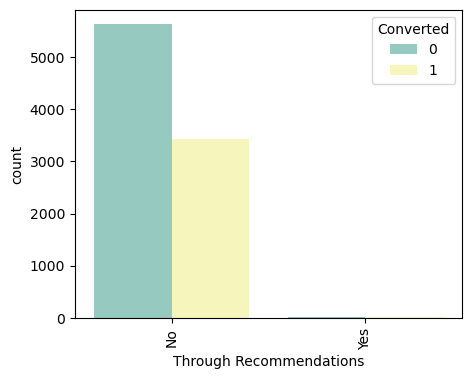

In [79]:
plt.figure(figsize=(5,4))
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads_data,palette='Set3')
plt.xticks(rotation = 90)
plt.show()

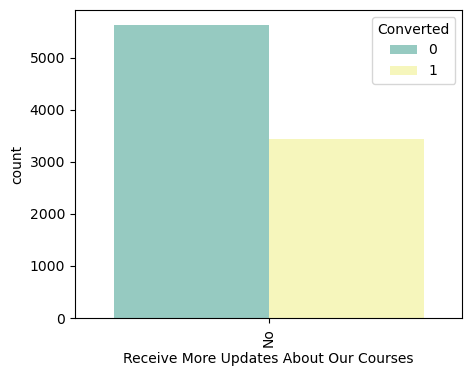

In [80]:
plt.figure(figsize=(5,4))
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads_data,palette='Set3')
plt.xticks(rotation = 90)
plt.show()

##### Analysis Comments:-
Most entries are 'No' for 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses'. Hence no conclusion can be drwan from these columns

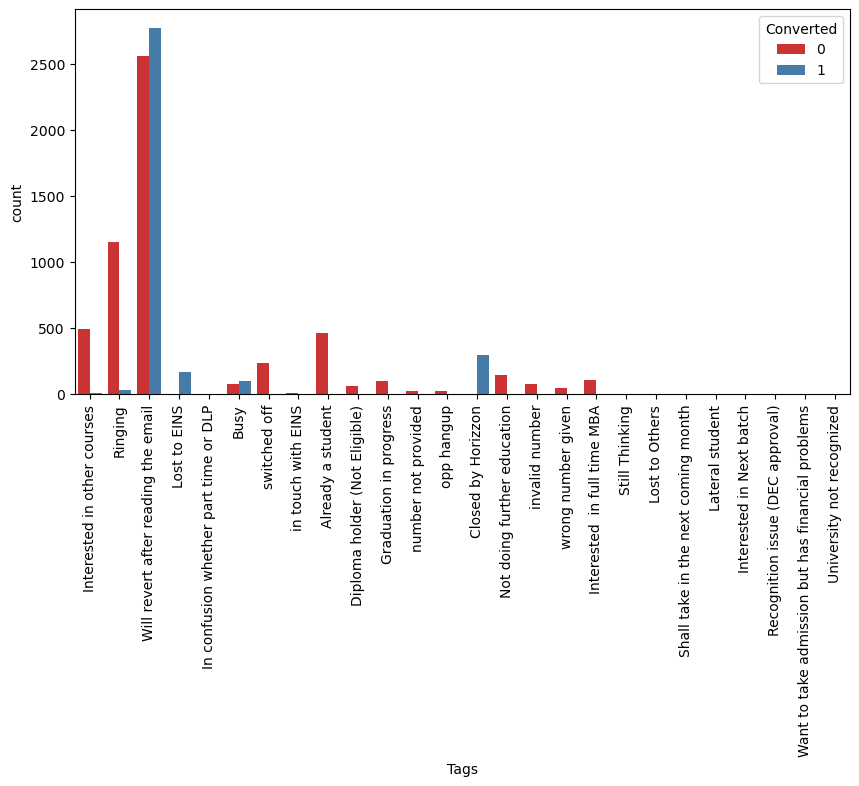

In [81]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Tags", hue = "Converted", data = leads_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

##### 'Tags' column is generated by the sales team for their analysis , so this is not available for model building . So we will need to remove this column before building the model.

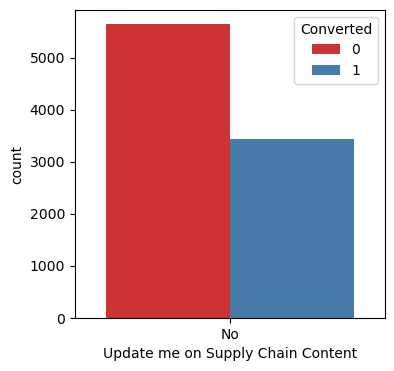

In [82]:
plt.figure(figsize=(4,4))
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = leads_data,palette='Set1')
plt.show()

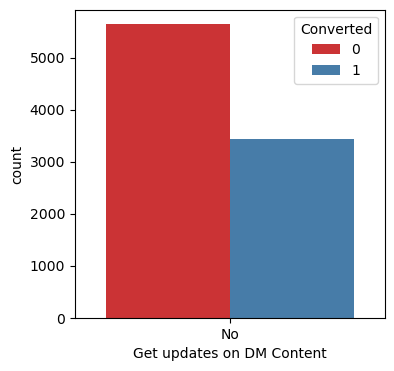

In [83]:
plt.figure(figsize=(4,4))
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads_data,palette='Set1')
plt.show()

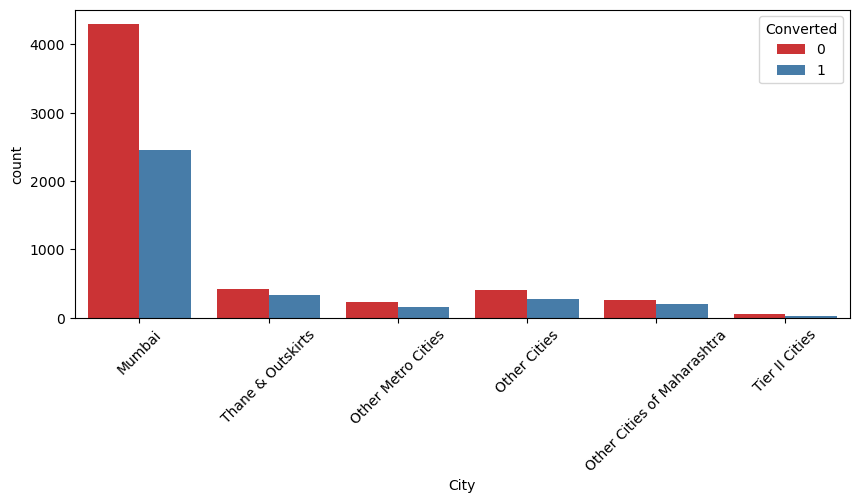

In [84]:
plt.figure(figsize=(10,4))
sns.countplot(x = "City", hue = "Converted", data = leads_data,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

##### Analysis comments:-
Most Leads are from 'Mumbai' and have approx. 50% conversion rate

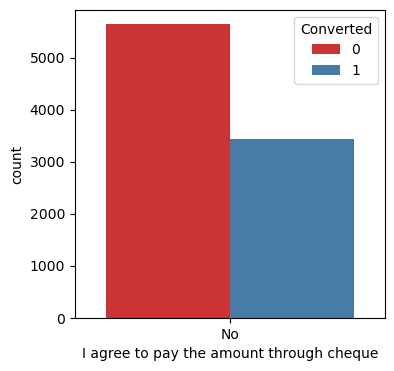

In [85]:
plt.figure(figsize=(4,4))
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads_data,palette='Set1')
plt.show()

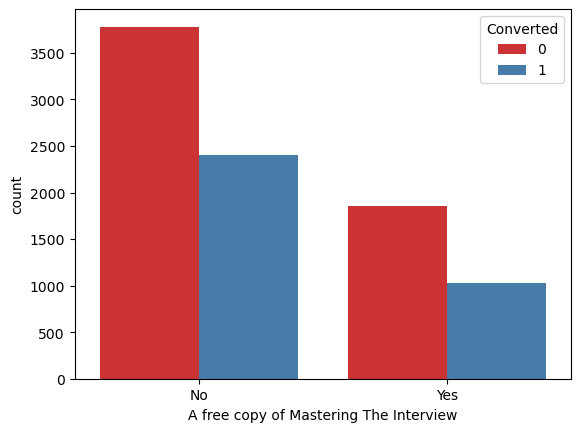

In [86]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads_data,palette='Set1')
plt.show()

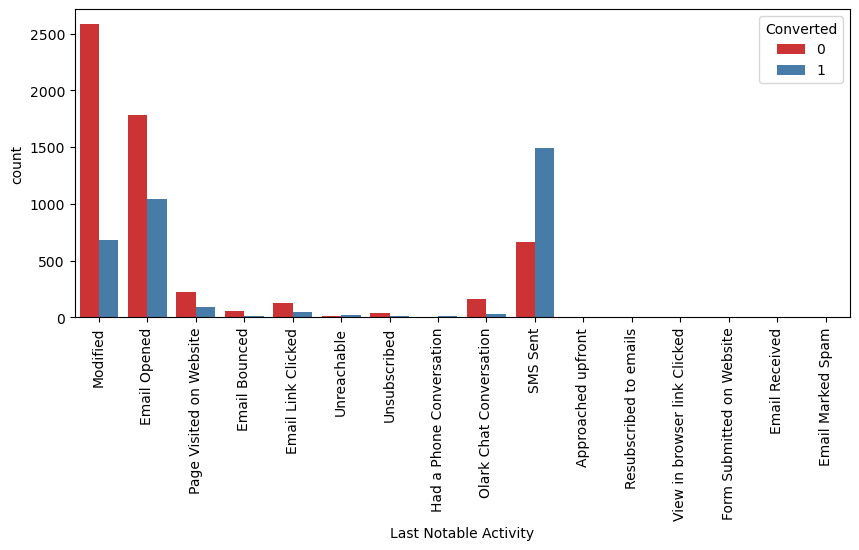

In [87]:
plt.figure(figsize=(10,4))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

##### Analysis comments:-
1. Most entries are 'No' for leads who wants to pay through cheque or who wants a free copy of Mastering the Interview
2. Many columns are not adding much information to our model. Hence we can drop them for further analysis

In [88]:
leads_data = leads_data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [89]:
leads_data.shape

(9074, 14)

In [90]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

In [91]:
vars=['Do Not Email','Do Not Call']
def binary_vars(x):
    return x.map({'Yes': 1, "No": 0})

leads_data[vars] = leads_data[vars].apply(binary_vars)

##### Creating Dummy Variables For Categorical Columns

In [92]:
dummy_vars = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_vars.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


##### Concatenating dummy variables into Leads Data set

In [93]:
leads_data=pd.concat([leads_data,dummy_vars], axis=1)
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


##### Dropping Columns for which dummies were created

In [94]:
leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
'City','Last Notable Activity'], axis = 1)

In [95]:
leads_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


##### Splitting data into Train Data set and Test Data set

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X=leads_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [98]:
y=leads_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

##### Scaling the features

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


##### Check Lead Conversion Rate

In [102]:
Converted = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
Converted

37.85541106458012

##### Lead conversion rate is 37.85%

##### Feature Selection Using RFE

In [103]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [104]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=logreg,n_features_to_select=20)
rfe=rfe.fit(X_train, y_train)

In [105]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True,  True,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
        True, False, False, False,  True,  True,  True, False, False,
       False, False, False])

In [106]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 10),
 ('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 28),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 40),
 ('Lead Source_Others', False, 32),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 53),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 27),
 ('Last Activity_Email Marked Spam', False, 12),
 ('Last Activity_Email Opened', False, 44),
 ('Last Activity_Email Received', False, 43),
 ('Last Activity_Form Submitted on Website', False, 13),
 ('Last Activity_Had a Phone Conversation', True,

In [107]:
cols=X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

##### Model Building

##### Model Assessment with StatsModels

In [108]:
import statsmodels.api as sm

##### Model-1

In [109]:
X_train_sm=sm.add_constant(X_train[cols])
logm1=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result=logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2581.1
Date:                Sun, 19 Nov 2023   Deviance:                       5162.3
Time:                        23:59:47   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4056
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2629      0.139      9.113      0.000       0.991       1.534
Do Not Email                                            -1.5994      0.202     -7.934      0.000      -1.994      -1.204
Total Time Spent on Website                              1.1077      0.041     27.082      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1038      0.129     -8.534      0.000      -1.357      -0.850
Lead Origin_Lead Add Form                                1.4559      0.896      1.625      0.104      -0.300       3.212
Lead Origin_Lead Import                                  0.9495      0.475      1.998      0.046       0.018       1.881
Lead Source_Olark Chat                                   1.1076      0.124      8.924      0.000       0.864       1.351
Lead Source_Reference                                    1.9171      0.920      2.085      0.037       0.115       3.719
Lead Source_Welingak Website                             4.5013      1.153      3.905      0.000       2.242       6.761
Last Activity_Converted to Lead                         -1.0475      0.229     -4.575      0.000      -1.496      -0.599
Last Activity_Email Bounced                             -1.2319      0.434     -2.840      0.005      -2.082      -0.382
Last Activity_Had a Phone Conversation                   1.8332      0.795      2.307      0.021       0.276       3.390
Last Activity_Olark Chat Conversation                   -1.3318      0.196     -6.809      0.000      -1.715      -0.948
Specialization_Others                                   -1.1091      0.126     -8.813      0.000      -1.356      -0.862
What is your current occupation_Housewife               22.7567   1.52e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Working Professional     2.6228      0.196     13.411      0.000       2.239       3.006
Last Notable Activity_Email Link Clicked                -1.8917      0.257     -7.366      0.000      -2.395      -1.388
Last Notable Activity_Email Opened                      -1.4480      0.089    -16.298      0.000      -1.622      -1.274
Last Notable Activity_Modified                          -1.7583      0.101    -17.401      0.000      -1.956      -1.560
Last Notable Activity_Olark Chat Conversation           -1.4901      0.378     -3.939      0.000      -2.232      -0.749
Last Notable Activity_Page Visited on Website           -1.7167      0.203     -8.437      0.000      -2.116      -1.318
========================================================================================================================
"""

##### We can see that p-value of 'What is your current occupation_Housewife' is very high. Hence, we can drop this column

In [110]:
col1=cols.drop('What is your current occupation_Housewife')

##### Model-2

In [111]:
X_train_sm=sm.add_constant(X_train[col1])
logm2=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result=logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.3
Date:                Sun, 19 Nov 2023   Deviance:                       5170.7
Time:                        23:59:53   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4048
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2649      0.138      9.134      0.000       0.993       1.536
Do Not Email                                            -1.6003      0.202     -7.938      0.000      -1.995      -1.205
Total Time Spent on Website                              1.1070      0.041     27.094      0.000       1.027       1.187
Lead Origin_Landing Page Submission                     -1.1043      0.129     -8.547      0.000      -1.357      -0.851
Lead Origin_Lead Add Form                                1.4532      0.896      1.622      0.105      -0.302       3.209
Lead Origin_Lead Import                                  0.9439      0.475      1.986      0.047       0.012       1.876
Lead Source_Olark Chat                                   1.1057      0.124      8.912      0.000       0.863       1.349
Lead Source_Reference                                    1.9343      0.919      2.104      0.035       0.132       3.736
Lead Source_Welingak Website                             4.5037      1.153      3.907      0.000       2.245       6.763
Last Activity_Converted to Lead                         -1.0474      0.229     -4.575      0.000      -1.496      -0.599
Last Activity_Email Bounced                             -1.2305      0.434     -2.837      0.005      -2.081      -0.380
Last Activity_Had a Phone Conversation                   1.8329      0.795      2.307      0.021       0.276       3.390
Last Activity_Olark Chat Conversation                   -1.3297      0.196     -6.798      0.000      -1.713      -0.946
Specialization_Others                                   -1.1139      0.126     -8.857      0.000      -1.360      -0.867
What is your current occupation_Working Professional     2.6183      0.196     13.386      0.000       2.235       3.002
Last Notable Activity_Email Link Clicked                -1.8827      0.256     -7.365      0.000      -2.384      -1.382
Last Notable Activity_Email Opened                      -1.4410      0.089    -16.235      0.000      -1.615      -1.267
Last Notable Activity_Modified                          -1.7578      0.101    -17.398      0.000      -1.956      -1.560
Last Notable Activity_Olark Chat Conversation           -1.4891      0.378     -3.936      0.000      -2.231      -0.748
Last Notable Activity_Page Visited on Website           -1.7164      0.203     -8.436      0.000      -2.115      -1.318
========================================================================================================================
"""

##### Dropping 'Last Activity_Had a Phone Conversation' column

In [112]:
col1 = col1.drop('Last Activity_Had a Phone Conversation')

##### Model-3

In [113]:
X_train_sm=sm.add_constant(X_train[col1])
logm3=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result=logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2588.7
Date:                Sun, 19 Nov 2023   Deviance:                       5177.3
Time:                        23:59:56   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4042
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2817      0.138      9.280      0.000       1.011       1.552
Do Not Email                                            -1.6060      0.202     -7.961      0.000      -2.001      -1.211
Total Time Spent on Website                              1.1056      0.041     27.096      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1097      0.129     -8.602      0.000      -1.363      -0.857
Lead Origin_Lead Add Form                                1.4426      0.895      1.612      0.107      -0.312       3.197
Lead Origin_Lead Import                                  0.9346      0.475      1.966      0.049       0.003       1.866
Lead Source_Olark Chat                                   1.0961      0.124      8.845      0.000       0.853       1.339
Lead Source_Reference                                    1.9336      0.919      2.104      0.035       0.133       3.734
Lead Source_Welingak Website                             4.5044      1.152      3.909      0.000       2.246       6.763
Last Activity_Converted to Lead                         -1.0570      0.229     -4.619      0.000      -1.505      -0.609
Last Activity_Email Bounced                             -1.2343      0.434     -2.846      0.004      -2.084      -0.384
Last Activity_Olark Chat Conversation                   -1.3368      0.196     -6.836      0.000      -1.720      -0.954
Specialization_Others                                   -1.1161      0.126     -8.885      0.000      -1.362      -0.870
What is your current occupation_Working Professional     2.6149      0.196     13.372      0.000       2.232       2.998
Last Notable Activity_Email Link Clicked                -1.8922      0.256     -7.404      0.000      -2.393      -1.391
Last Notable Activity_Email Opened                      -1.4515      0.089    -16.371      0.000      -1.625      -1.278
Last Notable Activity_Modified                          -1.7596      0.101    -17.438      0.000      -1.957      -1.562
Last Notable Activity_Olark Chat Conversation           -1.4899      0.378     -3.939      0.000      -2.231      -0.748
Last Notable Activity_Page Visited on Website           -1.7271      0.203     -8.492      0.000      -2.126      -1.328
========================================================================================================================
"""

##### Checking VIFs

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.42
6,Lead Source_Reference,48.08
7,Lead Source_Welingak Website,15.51
15,Last Notable Activity_Modified,2.73
11,Specialization_Others,2.46
2,Lead Origin_Landing Page Submission,2.37
5,Lead Source_Olark Chat,2.09
10,Last Activity_Olark Chat Conversation,2.03
14,Last Notable Activity_Email Opened,1.89
0,Do Not Email,1.85


##### 'Lead Origin_Lead Add Form' has high p-value and high VIF. We can drop this column

In [116]:
col1 = col1.drop('Lead Origin_Lead Add Form')

##### Model-4

In [117]:
X_train_sm=sm.add_constant(X_train[col1])
logm4=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result=logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.1
Date:                Mon, 20 Nov 2023   Deviance:                       5180.1
Time:                        00:00:03   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3018      0.138      9.452      0.000       1.032       1.572
Do Not Email                                            -1.6086      0.202     -7.974      0.000      -2.004      -1.213
Total Time Spent on Website                              1.1034      0.041     27.085      0.000       1.024       1.183
Lead Origin_Landing Page Submission                     -1.1279      0.129     -8.767      0.000      -1.380      -0.876
Lead Origin_Lead Import                                  0.9185      0.476      1.932      0.053      -0.013       1.850
Lead Source_Olark Chat                                   1.0888      0.124      8.804      0.000       0.846       1.331
Lead Source_Reference                                    3.3617      0.243     13.830      0.000       2.885       3.838
Lead Source_Welingak Website                             5.9381      0.733      8.104      0.000       4.502       7.374
Last Activity_Converted to Lead                         -1.0589      0.229     -4.630      0.000      -1.507      -0.611
Last Activity_Email Bounced                             -1.2342      0.434     -2.845      0.004      -2.084      -0.384
Last Activity_Olark Chat Conversation                   -1.3413      0.196     -6.860      0.000      -1.725      -0.958
Specialization_Others                                   -1.1281      0.125     -8.991      0.000      -1.374      -0.882
What is your current occupation_Working Professional     2.6121      0.196     13.354      0.000       2.229       2.995
Last Notable Activity_Email Link Clicked                -1.8954      0.256     -7.418      0.000      -2.396      -1.395
Last Notable Activity_Email Opened                      -1.4529      0.089    -16.388      0.000      -1.627      -1.279
Last Notable Activity_Modified                          -1.7603      0.101    -17.448      0.000      -1.958      -1.563
Last Notable Activity_Olark Chat Conversation           -1.4885      0.378     -3.935      0.000      -2.230      -0.747
Last Notable Activity_Page Visited on Website           -1.7208      0.203     -8.492      0.000      -2.118      -1.324
========================================================================================================================
"""

##### 'Lead Origin_Lead Import' has high p-value. This column can be dropped

In [118]:
col1 = col1.drop('Lead Origin_Lead Import')

##### Model-5

In [119]:
X_train_sm=sm.add_constant(X_train[col1])
logm5=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result=logm5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.8
Date:                Mon, 20 Nov 2023   Deviance:                       5183.5
Time:                        00:00:08   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4036
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3380      0.137      9.787      0.000       1.070       1.606
Do Not Email                                            -1.6086      0.202     -7.979      0.000      -2.004      -1.214
Total Time Spent on Website                              1.0959      0.040     27.080      0.000       1.017       1.175
Lead Origin_Landing Page Submission                     -1.1641      0.128     -9.130      0.000      -1.414      -0.914
Lead Source_Olark Chat                                   1.0618      0.123      8.656      0.000       0.821       1.302
Lead Source_Reference                                    3.3261      0.242     13.725      0.000       2.851       3.801
Lead Source_Welingak Website                             5.9126      0.733      8.070      0.000       4.477       7.349
Last Activity_Converted to Lead                         -1.0641      0.229     -4.656      0.000      -1.512      -0.616
Last Activity_Email Bounced                             -1.2351      0.434     -2.847      0.004      -2.085      -0.385
Last Activity_Olark Chat Conversation                   -1.3474      0.196     -6.889      0.000      -1.731      -0.964
Specialization_Others                                   -1.1499      0.125     -9.173      0.000      -1.396      -0.904
What is your current occupation_Working Professional     2.6124      0.196     13.361      0.000       2.229       2.996
Last Notable Activity_Email Link Clicked                -1.8946      0.255     -7.418      0.000      -2.395      -1.394
Last Notable Activity_Email Opened                      -1.4457      0.088    -16.336      0.000      -1.619      -1.272
Last Notable Activity_Modified                          -1.7558      0.101    -17.420      0.000      -1.953      -1.558
Last Notable Activity_Olark Chat Conversation           -1.4783      0.378     -3.911      0.000      -2.219      -0.737
Last Notable Activity_Page Visited on Website           -1.7218      0.202     -8.506      0.000      -2.118      -1.325
========================================================================================================================
"""

##### Dropping the column 'Last Activity_Email Bounced' to reduce the variables

In [120]:
col1 = col1.drop('Last Activity_Email Bounced')

##### Model-6

In [121]:
X_train_sm=sm.add_constant(X_train[col1])
logm6=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result=logm6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.6
Date:                Mon, 20 Nov 2023   Deviance:                       5193.2
Time:                        00:00:11   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4027
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3480      0.136      9.876      0.000       1.080       1.616
Do Not Email                                            -1.9286      0.178    -10.834      0.000      -2.277      -1.580
Total Time Spent on Website                              1.0972      0.040     27.133      0.000       1.018       1.176
Lead Origin_Landing Page Submission                     -1.1685      0.127     -9.177      0.000      -1.418      -0.919
Lead Source_Olark Chat                                   1.0576      0.123      8.628      0.000       0.817       1.298
Lead Source_Reference                                    3.3544      0.243     13.803      0.000       2.878       3.831
Lead Source_Welingak Website                             5.9651      0.736      8.101      0.000       4.522       7.408
Last Activity_Converted to Lead                         -1.0493      0.229     -4.592      0.000      -1.497      -0.601
Last Activity_Olark Chat Conversation                   -1.3281      0.196     -6.791      0.000      -1.711      -0.945
Specialization_Others                                   -1.1560      0.125     -9.234      0.000      -1.401      -0.911
What is your current occupation_Working Professional     2.6087      0.195     13.379      0.000       2.227       2.991
Last Notable Activity_Email Link Clicked                -1.9002      0.256     -7.433      0.000      -2.401      -1.399
Last Notable Activity_Email Opened                      -1.4512      0.088    -16.399      0.000      -1.625      -1.278
Last Notable Activity_Modified                          -1.7762      0.100    -17.702      0.000      -1.973      -1.580
Last Notable Activity_Olark Chat Conversation           -1.4942      0.378     -3.949      0.000      -2.236      -0.753
Last Notable Activity_Page Visited on Website           -1.7108      0.203     -8.427      0.000      -2.109      -1.313
========================================================================================================================
"""

##### Checking VIF again

In [122]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Modified,2.67
8,Specialization_Others,2.46
2,Lead Origin_Landing Page Submission,2.36
3,Lead Source_Olark Chat,2.08
7,Last Activity_Olark Chat Conversation,2.01
11,Last Notable Activity_Email Opened,1.87
13,Last Notable Activity_Olark Chat Conversation,1.37
1,Total Time Spent on Website,1.27
6,Last Activity_Converted to Lead,1.23
4,Lead Source_Reference,1.21


##### Analysis Comments:-
We can see the p-values of all variables is 0 and VIF values are low for all the variables, model-6 is our final model. We have 15 variables in our final model.

##### Model Evaluation

##### Prediction on Train set

In [123]:
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

3009    0.190382
1012    0.291331
9226    0.182170
4750    0.878953
7987    0.649536
1281    0.765910
2880    0.096330
4971    0.968839
7536    0.850076
1248    0.608702
dtype: float64

In [124]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19038165, 0.29133124, 0.18217003, 0.87895284, 0.64953608,
       0.76590981, 0.09632987, 0.96883896, 0.85007641, 0.60870207])

##### Dataframe Creation with the actual Converted flag and the predicted probabilities

In [125]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.190382,3009
1,0,0.291331,1012
2,0,0.182170,9226
3,1,0.878953,4750
4,1,0.649536,7987


##### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

In [126]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [127]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.190382,3009,0
1,0,0.291331,1012,0
2,0,0.182170,9226,0
3,1,0.878953,4750,1
4,1,0.649536,7987,1


##### Confusion Matrix

In [128]:
from sklearn import metrics

In [129]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3457  448]
 [ 717 1729]]


##### Metrics beyond simply accuracy

In [130]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3457      448
# converted            717       1729 

##### Overall Accuracy

In [131]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8165643205794363


In [132]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

##### Sensitivity

In [133]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7068683565004088


##### Specificity

In [134]:
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8852752880921895


In [135]:
# Calculating false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.1147247119078105


In [136]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7942122186495176


In [137]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8282223287014854


##### Analysis Comments:-
1. We can see from our analysis that Specificity is good(~88%) but sensitivity was only 70%. We need to take care of this.
2. We have got sensitivity of 70% because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

##### ROC Curve

In [138]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [139]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

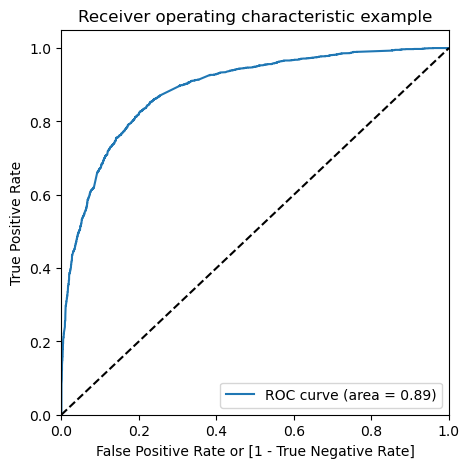

In [140]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

##### From the plot , we can see that we have higher (0.89) area under the ROC curve , therefore our model is a good one.

##### Finding Optimal cut-off point

##### Column creation with different probability cut-offs

In [141]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.190382,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.291331,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.182170,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.878953,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.649536,7987,1,1,1,1,1,1,1,1,0,0,0


##### Calculating accuracy sensitivity and specificity for various probability cutoffs.

In [142]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.599906  0.972200  0.366709
0.2   0.2  0.760195  0.907195  0.668118
0.3   0.3  0.801606  0.848324  0.772343
0.4   0.4  0.812785  0.780458  0.833035
0.5   0.5  0.816564  0.706868  0.885275
0.6   0.6  0.801449  0.601390  0.926761
0.7   0.7  0.782396  0.515536  0.949552
0.8   0.8  0.766179  0.439493  0.970807
0.9   0.9  0.724138  0.303761  0.987452


##### Plotting accuracy sensitivity and specificity for various probabilities

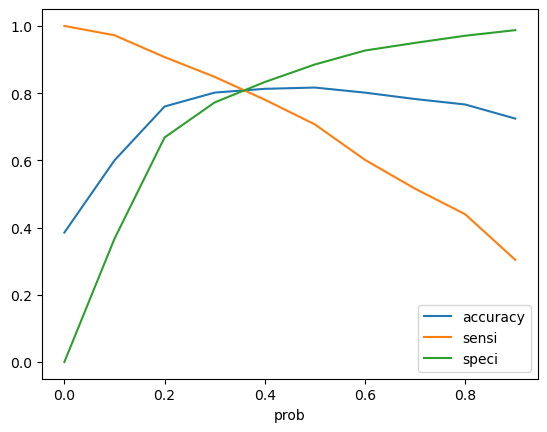

In [143]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show() 

##### From the above curve, 0.34 is the optimum point to take it as a cutoff probability

In [144]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.190382,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.291331,1012,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.182170,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.878953,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.649536,7987,1,1,1,1,1,1,1,1,0,0,0,1


##### Assigning Lead Score to the Train data set

In [145]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.190382,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.291331,1012,0,1,1,1,0,0,0,0,0,0,0,0,29
2,0,0.182170,9226,0,1,1,0,0,0,0,0,0,0,0,0,18
3,1,0.878953,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.649536,7987,1,1,1,1,1,1,1,1,0,0,0,1,65


##### Checking Accuracy again

In [146]:
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8083766336010078


##### Confusion matrix

In [147]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3113,  792],
       [ 425, 2021]], dtype=int64)

In [148]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [149]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8262469337694195


In [150]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7971830985915493


In [151]:
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.2028169014084507


In [152]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7184500533238536


In [153]:
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8798756359525155


##### Precision and Recall

##### Confusion matrix

In [154]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3457,  448],
       [ 717, 1729]], dtype=int64)

##### Precision

In [155]:
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7942122186495176


##### Recall

In [156]:
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7068683565004088


In [157]:
from sklearn.metrics import precision_score, recall_score

In [158]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7942122186495176


In [159]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7068683565004088


##### Precision and Recall tradeoff

In [160]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [161]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

##### Plotting a trade-off curve between precision and recall

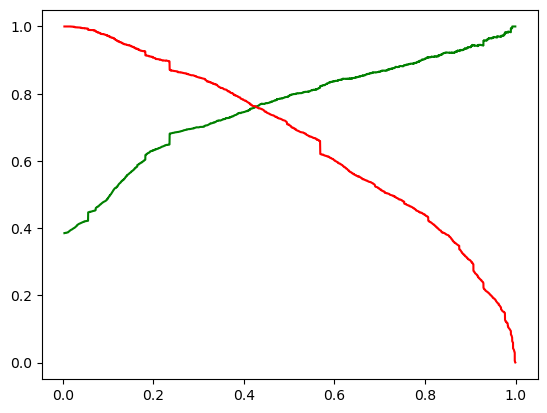

In [162]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##### Predictions on the test set

##### Scaling the test data

In [163]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [164]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,-0.600595,0,0,0,0,0,0,1,0,0,1,0,0,0
1490,0,1.887326,1,0,0,0,0,0,0,1,0,1,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,1,0,0,1,0,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,0,1,0,0
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,1,0,0,0


In [165]:
X_test_sm = sm.add_constant(X_test)

y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

3271    0.128065
1490    0.967948
7936    0.110537
4216    0.875575
3830    0.128243
1800    0.625972
6507    0.369153
4821    0.294465
4223    0.928998
4714    0.182170
dtype: float64

In [166]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [167]:
y_pred_1.head()

,0
3271,0.128065
1490,0.967948
7936,0.110537
4216,0.875575
3830,0.128243


In [168]:
y_test_df = pd.DataFrame(y_test)

In [169]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [170]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [171]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [172]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.128065
1,1,1490,0.967948
2,0,7936,0.110537
3,1,4216,0.875575
4,0,3830,0.128243


In [173]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [174]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [175]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.128065
1,1490,1,0.967948
2,7936,0,0.110537
3,4216,1,0.875575
4,3830,0,0.128243


In [176]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [177]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.128065,0
1,1490,1,0.967948,1
2,7936,0,0.110537,0
3,4216,1,0.875575,1
4,3830,0,0.128243,0


##### Overall Accuracy

In [178]:
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8005875872199779


##### Confusion Matrix

In [179]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1375,  359],
       [ 184,  805]], dtype=int64)

In [180]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

##### Sensitivity of Logistic Regression Model

In [181]:
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.813953488372093


##### Specificity of Logistic Regression Model

In [182]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.792964244521338


##### Assigning Lead score to Test Data set

In [183]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.128065,0,13
1,1490,1,0.967948,1,97
2,7936,0,0.110537,0,11
3,4216,1,0.875575,1,88
4,3830,0,0.128243,0,13


##### Observations:
After running the model on the Test Data , we obtain:

1. Accuracy : 80.05 %
2. Sensitivity : 81.39 %
3. Specificity : 79.29 %

##### Results :-
Comparing the values obtained for Train & Test:

Train Data:
1. Accuracy : 80.84 %
2. Sensitivity : 82.62 %
3. Specificity : 79.72 %

Test Data:

1. Accuracy : 80.05 %
2. Sensitivity : 81.39 %
3. Specificity : 79.29 %